In [1]:
from func_adl_servicex import ServiceXSourceUpROOT
from hist import Hist
import mplhep as mpl
import awkward as ak

In [2]:
files = {
    'ggH125_ZZ4lep':
        {
            'files': ['root://eospublic.cern.ch//eos/opendata/atlas/OutreachDatasets/2020-01-22/4lep/MC/mc_345060.ggH125_ZZ4lep.4lep.root'],
            'treename': 'ggH125_ZZ4lep'
        },
}

In [4]:
data = ServiceXSourceUpROOT(files['ggH125_ZZ4lep']['files'], 'mini', backend_name='uproot-af') \
    .Select("lambda e: {'lep_pt': e['lep_pt']}") \
    .AsAwkwardArray() \
    .value()

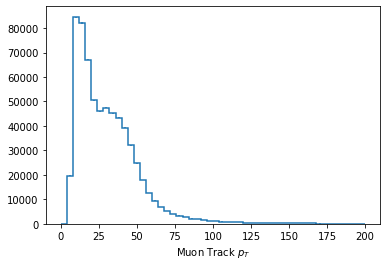

In [5]:
h = (Hist.new
     .Reg(50, 0, 200, name='mu_pt', label='Muon Track $p_T$')
     .Int64()
     )
h.fill(ak.flatten(data['lep_pt'])/1000.0)
_ = h.plot()